# Cluster Analysis Course Notebook

### Importing Data files

In [17]:
#Import Product DataSet here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
product_data = pd.read_csv('Product Data Set - Student 2 of 3.csv' ,sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [2]:
#Import Transaction DataSet here
transactions_data = pd.read_csv('Transaction Data Set - Student 3 of 3.csv' ,sep ='|')
transactions_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [3]:
#Import Customer Dataset Here
customer_data = pd.read_csv('Customer Data Set - Student 1 of 3.csv')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


### Changing data types

In [5]:
#customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))
#customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))
customer_data['INCOME'] =customer_data['INCOME'].str.replace('$','').str.replace(',','').astype('int')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single
4,10005,0,30,51498,3,notenrolled,NaN,1,Single


### Creating Customer View

In [6]:
trans_products=transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [7]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [8]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [9]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

In [10]:
customer_prod_categ=customer_prod_categ.reset_index()

In [11]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [12]:
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})

In [13]:
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )

In [14]:
customer_KPIs=customer_KPIs.fillna(0)


In [96]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [97]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# Clustering  

In [74]:
#Begin Writing your code here
cluster_input=customer_all_view[['INCOME','TOTAL SPENT']]
cluster_input.head(5)

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


In [75]:
Kmeans_model=KMeans(n_clusters=4)
Kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
cluster_output = Kmeans_model.fit_predict(cluster_input)

In [77]:
cluster_output

array([1, 2, 2, 2, 0, 1, 2, 3, 3, 2, 0, 3, 2, 2, 0, 2, 2, 3, 1, 0, 3, 3,
       3, 0, 3, 3, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 2, 2, 2,
       1, 0, 0, 2, 1, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 2, 3, 1, 3, 1, 2,
       2, 3, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 3, 1, 3, 0, 3, 1, 0,
       2, 0, 3, 1, 3, 3, 3, 2, 3, 0, 1, 3, 0, 0, 0, 0, 2, 3, 3, 0, 2, 0,
       0, 0, 2, 0, 3, 0, 1, 1, 2, 2, 0, 2, 3, 0, 2, 2, 3, 2, 0, 1, 2, 2,
       0, 2, 1, 2, 1, 1, 3, 2, 2, 0, 0, 0, 2, 3, 2, 0, 3, 2, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 0, 1, 0, 1, 3, 0, 2, 0, 1, 2, 0, 1, 0, 3, 3, 1, 0,
       1, 1, 3, 0, 1, 0, 2, 0, 3, 1, 3, 3, 0, 1, 0, 3, 3, 1, 3, 1, 3, 1,
       3, 2, 3, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 3, 1, 0, 0, 0, 2,
       2, 2, 2, 0, 3, 3, 1, 0, 2, 3, 0, 3, 0, 2, 0, 1, 3, 3, 0, 1, 0, 2,
       2, 1, 3, 2, 2, 3, 1, 0, 1, 0, 0, 0, 1, 2, 3, 3, 3, 2, 2, 2, 1, 2,
       3, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,

In [78]:
segment_DF = cluster_input.copy()
segment_DF['segment'] = cluster_output

In [79]:
segment_DF.head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,1
1,94475,5062.451,2
2,88610,8562.440,2
3,84313,5522.694,2
4,51498,213.512,0


In [80]:
Kmeans_model.cluster_centers_

array([[ 40510.09803922,   2472.75349673],
       [138629.34482759,   6996.87572414],
       [ 79703.36956522,   5428.75010145],
       [111789.98360656,   7856.9202541 ]])

In [81]:
segment_DF[segment_DF.segment==0].head()

,INCOME,TOTAL SPENT,segment
4,51498,213.512,0
10,20256,1496.871,0
14,57251,7398.953,0
19,59964,4306.776,0
23,51529,2884.220,0


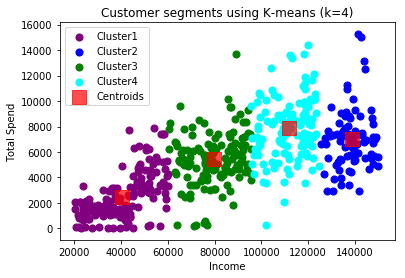

In [82]:
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')
plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster2')
plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster3')
plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster4')
plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments using K-means (k=4)')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

In [98]:
customer_demographics = customer_all_view.copy()
customer_demographics['segment']=cluster_output

In [84]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median'})

,AGE,HOUSEHOLD SIZE
segment,,
0,25.104575,2.0
1,73.609195,2.0
2,36.615942,3.5
3,48.032787,3.0


In [85]:
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent

In [86]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,25.104575,2.0,50.326797
1,73.609195,2.0,65.517241
2,36.615942,3.5,33.333333
3,48.032787,3.0,68.852459


In [87]:
AgglomerativeClustering_model=AgglomerativeClustering(n_clusters=4)
AgglomerativeClustering_model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x035151E0>)

In [88]:
cluster_output_1 = AgglomerativeClustering_model.fit_predict(cluster_input)

In [91]:
segment_DF_1 = cluster_input.copy()
segment_DF_1['segment'] = cluster_output_1

In [92]:
segment_DF_1.head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,0
1,94475,5062.451,3
2,88610,8562.440,3
3,84313,5522.694,3
4,51498,213.512,1


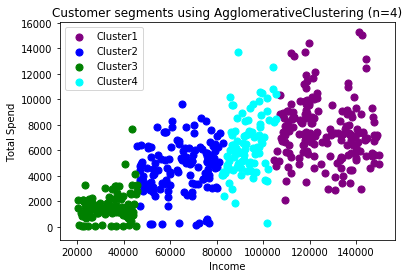

In [95]:
plt.scatter(segment_DF_1[segment_DF_1.segment==0]['INCOME'],segment_DF_1[segment_DF_1.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')
plt.scatter(segment_DF_1[segment_DF_1.segment==1]['INCOME'],segment_DF_1[segment_DF_1.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster2')
plt.scatter(segment_DF_1[segment_DF_1.segment==2]['INCOME'],segment_DF_1[segment_DF_1.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster3')
plt.scatter(segment_DF_1[segment_DF_1.segment==3]['INCOME'],segment_DF_1[segment_DF_1.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster4')
plt.title('Customer segments using AgglomerativeClustering (n=4)')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

In [99]:
customer_demographics_1 = customer_all_view.copy()
customer_demographics_1['segment']=cluster_output_1

In [100]:
customer_demographics_1.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,61.382022,3,70.224719
1,32.430769,3,33.846154
2,22.620000,2,58.000000
3,40.804348,4,40.217391
